In [ ]:
#NO

In [1]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram

In [3]:
@model HM_BD_F_PNT begin
    @parameter begin
        M_Fr_body = 44.01
        g = 9.8
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "HM_BD_F_PNT")
end

HM_BD_F_PNT (generic function with 1 method)

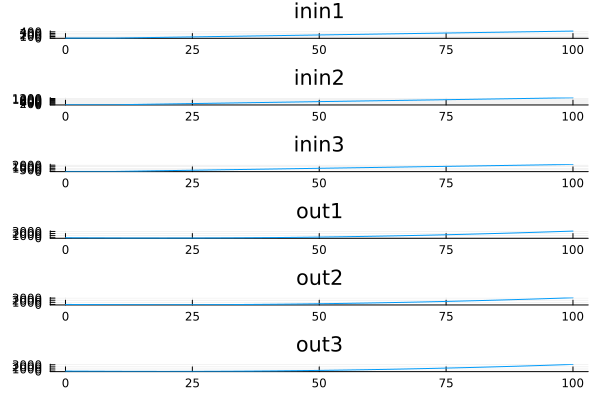

In [4]:
@model Test_HM_BD_F_PNT begin
    @block begin
        p = HM_BD_F_PNT()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
        ramp3 = Ramp(starttime=10, slope=25)
    end
    @connect begin
        ramp1.out => p.F_HM_HD_F_N
        ramp2.out => p.F_HM_VS_F_N 
        ramp3.out => p.F_ST_F2HM_F_N
    end
    @scope begin
        p.F_HM_HD_F_N => inin1
        p.F_HM_VS_F_N => inin2
        p.F_ST_F2HM_F_N => inin3
        p.v_HM_BD_F2HM_HD_F_mps => out1
        p.v_HM_BD_F2HM_VS_F_mps => out2
        p.v_HM_BD_F2ST_F_mps => out3
    end
end

m = @compile Test_HM_BD_F_PNT()
res = simulate(m, tspan=[0, 100])
plot(res)

In [6]:
@model HM_HD_F_PNT begin
    @parameter begin
        M_Fr_head = 27.6
        r_Fr_head = 0.21857
        theta_Fr_head = 1.3251
        k_Fr_head = 1210
        d_Fr_head = 8.17
        I_Fr_head = 1.8
        x_k_Fr_head_ini = -0.011885
        g = 9.8
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "HM_HD_F_PNT")
end

HM_HD_F_PNT (generic function with 1 method)

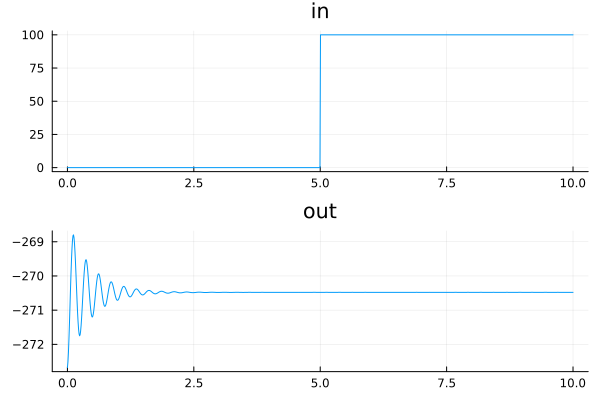

In [9]:
@model TestHM_HD_F_PNT begin
    @block begin
        m = HM_HD_F_PNT()
        s1 = Step(steptime=5, finalvalue=100)
    end
    @connect begin
        s1.out => m.v_HM_BD_F2HM_HD_mps
    end
    @scope begin
        m.v_HM_BD_F2HM_HD_mps => in
        m.F_HM_HD_F_N => out
    end
end

m = @compile_derivative TestHM_HD_F_PNT() #１つでも微分ブロックがあるなら@compile_derivativeを書き足す,この場合はmatlabの結果と異なる場合がある
res = simulate(m, tspan=[0, 10])
plot(res)

In [18]:
@model HM_VS_F_PNT begin
    @parameter begin
        kz_Fr_body_organs=82200
        dz_Fr_body_organs=195
        M_Fr_body_organs=12.8
        g=9.8
        z_kz_Fr_body_organs_ini=0.001526
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "HM_VS_F_PNT")
end

HM_VS_F_PNT (generic function with 1 method)

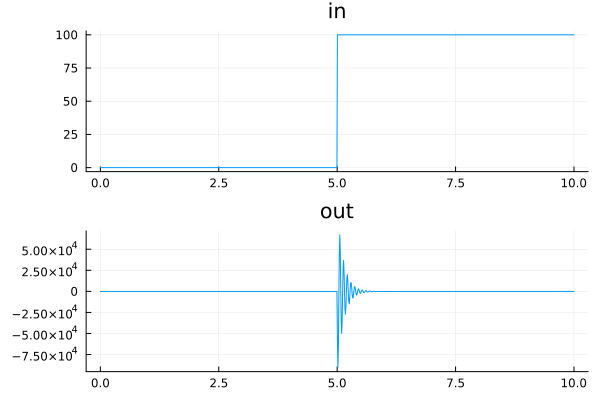

In [19]:
@model TestHM_VS_F_PNT begin
    @block begin
        m = hm_vs_f_pnt()
        s1 = Step(steptime=5, finalvalue=100)
    end
    @connect begin
        s1.out => m.v_HM_BD_F2HM_VS_F_mps
    end
    @scope begin
        m.v_HM_BD_F2HM_VS_F_mps => in
        m.F_HM_VS_F_N => out
    end
end

m = @compile TestHm_vs_f_pnt() 
res = simulate(m, tspan=[0, 10])
plot(res)

In [21]:
@buildxml "hm" HM_BD_F_PNT HM_HD_F_PNT hm_vs_f_pnt #使うモデル群を書き連ねる

6708

In [22]:
###HM_F_PNT

In [23]:
@model HM_F_PNT begin
    @xmlmodel("METI_Vertical_Vibration.drawio", "HM_F_PNT")
end

HM_F_PNT (generic function with 1 method)

In [24]:
@model TestHM_F_PNT begin
    @block begin
        m = HM_F_PNT()
        s1 = Step(steptime=5, finalvalue=100)
    end
    @connect begin
        s1.out => m.F_ST_F2HM_F_N
    end
    @scope begin
        m.F_ST_F2HM_F_N => in
        m.v_HM_BD_F2ST_F_mps => out
    end
end

m = @compile TestHM_F_PNT() 
res = simulate(m, tspan=[0, 10])
plot(res)

UndefVarError: UndefVarError: `##2009` not defined